# Prédiction des salaires à partir des descriptions de postes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config IPCompleter.greedy = True
%matplotlib inline

In [8]:
df = pd.read_csv("data/data_cleaned_2021.csv")
df.shape

(742, 42)

In [9]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [10]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [11]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

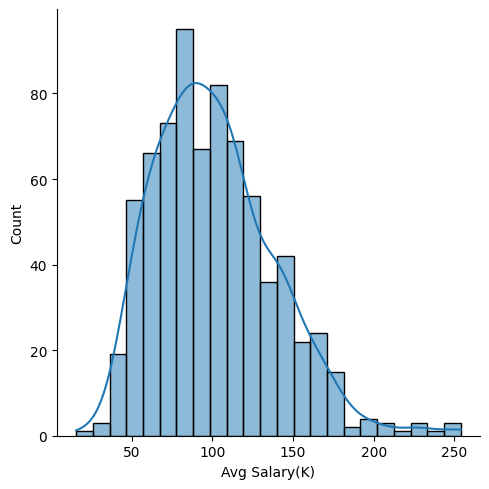

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df,x="Avg Salary(K)",kde=True)
plt.show()

D'après le displot ci-dessus nous pouvons dire que le distribution du salaire est normale.

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


In [178]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.8, min_df=2)
X = tfidf_vector.fit_transform(df["Job Description"])
y = df["Avg Salary(K)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = Ridge(alpha=0.0999)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Données de test : R^2 =",r2_score(y_test,y_pred))

x_val = pd.Series(['Director','Manager','Data Scientist','Data Engineer','Machine Learning Engineer'])
x_transform = tfidf_vector.transform(x_val)
y_pred = clf.predict(x_transform)
result = pd.DataFrame(x_val,columns=["Job Description"])
result["salaire"] = y_pred
result


Données de test : R^2 = 0.8128784944896617


,Job Description,salaire
0,Director,114.752686
1,Manager,87.204588
2,Data Scientist,124.465442
3,Data Engineer,91.354771
4,Machine Learning Engineer,114.118360


In [177]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.8, min_df=2)
X = tfidf_vector.fit_transform(df["Job Description"])
y = df["Avg Salary(K)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = Ridge(alpha=0.0999)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Données de test : R^2 =",r2_score(y_test,y_pred))

x_val = pd.Series(['Director','Manager','Data Scientist','Data Engineer','Machine Learning Engineer'])
x_transform = tfidf_vector.transform(x_val)
y_pred = clf.predict(x_transform)
result = pd.DataFrame(x_val,columns=["Job Description"])
result["salaire"] = y_pred
result


Données de test : R^2 = 0.8128784944896617


,Job Description,salaire
0,Director,114.752686
1,Manager,87.204588
2,Data Scientist,124.465442
3,Data Engineer,91.354771
4,Machine Learning Engineer,114.118360


Affichez les 10 features les plus importantes pour votre modèle.

In [173]:
best_index = clf.coef_.argsort()[-10:][::-1]
for index in best_index:
    print(tfidf_vector.get_feature_names_out()[index])

gallup
actuarial
scientists
platform
grand
biomarker
predictive
climate
infrastructure
visa
